In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
sns.set_style("darkgrid")

In [2]:
iris = load_iris()

In [3]:
iris['data'], iris['target'], iris['feature_names']

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [4]:
x = pd.DataFrame(iris['data'], columns = iris['feature_names'])
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y = pd.Series(iris['target'], name='cvet')
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: cvet, Length: 150, dtype: int64

In [6]:
ylabel = {i : ime for i,ime in enumerate(iris['target_names'])}
print(ylabel)

{0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}


In [7]:
df = pd.concat([x,y],axis = 1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cvet
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df['imeCveta'] = df['cvet'].map(ylabel)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cvet,imeCveta
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

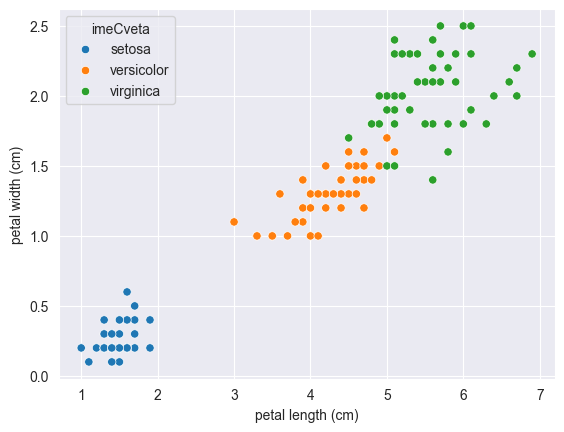

In [10]:
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue = df['imeCveta'])

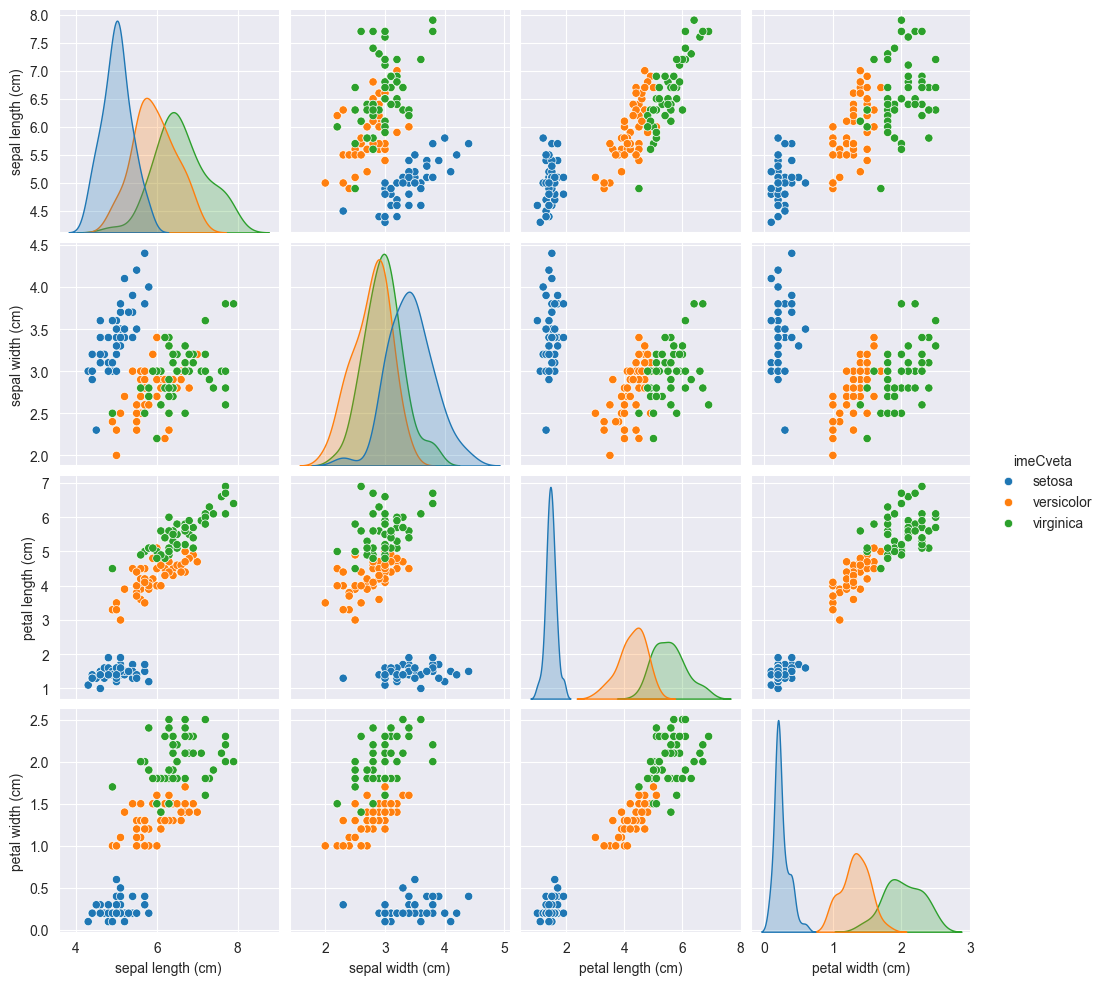

In [11]:
sns.pairplot(df.drop('cvet', axis = 1), hue = 'imeCveta')

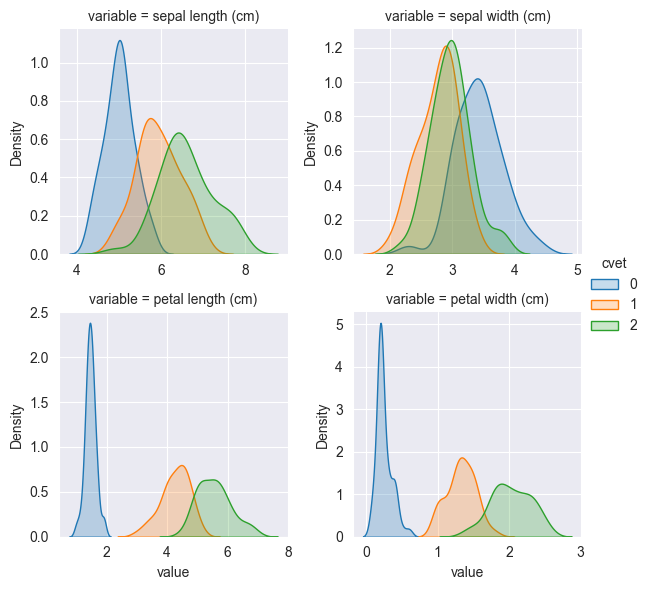

In [12]:
df_melted = df.melt(id_vars="cvet", value_vars=df.columns[:4], var_name="variable", value_name="value")

# Kreiranje FacetGrid-a sa hue da prikaže različite vrste cveća
g = sns.FacetGrid(df_melted, col="variable", hue="cvet", col_wrap=2, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x="value", fill=True)

g.add_legend()

In [19]:
dftest[dftest['cvet'] != dftest['pred']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cvet,imeCveta,pred
70,5.9,3.2,4.8,1.8,1,versicolor,2


In [20]:
confusion_matrix(ytest,pred), ylabel

(array([[15,  0,  0],
        [ 0, 12,  1],
        [ 0,  0, 10]]),
 {0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')})

(<Axes: xlabel='None', ylabel='cvet'>,
 {0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')})

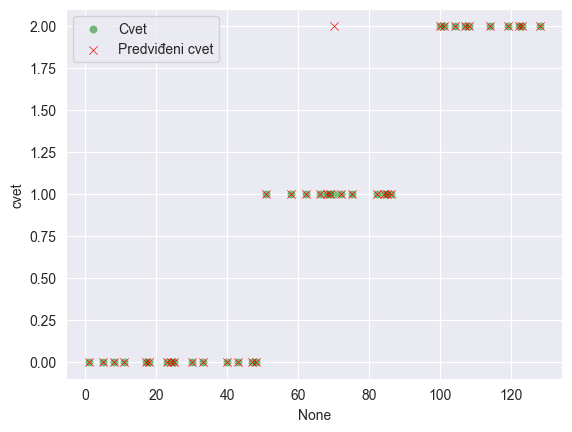

In [21]:
sns.scatterplot(x=dftest.index, y=dftest['cvet'], color='green', label="Cvet", alpha=0.5)
sns.scatterplot(x=dftest.index, y=dftest['pred'], color='red', label="Predviđeni cvet", marker='x'), ylabel

In [52]:
x = pd.DataFrame(iris.data[:,2:], columns = iris['feature_names'][2:])
x

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [55]:
y = pd.Series(iris['target'], name = 'cvet')
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: cvet, Length: 150, dtype: int64

In [56]:
df = pd.concat([x,y], axis = 1)
df

,petal length (cm),petal width (cm),cvet
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [241]:
def podrzaneVektorMasine(x, y, p = 0.2, c = 1, kernel = 'rbf', seed = 420):
    xtr,xtest, ytr, ytest = train_test_split(x, y, test_size=p, random_state= seed)
    model = SVC(kernel = kernel,C = c)
    model.fit(xtr,ytr)
    pred = model.predict(xtest)
    train = model.predict(xtr)
    dftest = pd.concat([xtest,ytest, pd.Series(pred, name = 'pred', index = xtest.index)], axis = 1)
    # print(confusion_matrix(ytest,pred))
    # print(f' Model je pogresio u sledecim primerima\n : {dftest[dftest['cvet'] != dftest['pred']]}')
    #sns.scatterplot(data=dftest, x = dftest.iloc[:,0], y = dftest.iloc[:,1], hue='cvet', style = 'pred', alpha = 0.6, s = 100)
    #plt.show()
    dftr = pd.concat([xtr,ytr, pd.Series(train, name = 'train', index = xtr.index)], axis = 1)
    #sns.scatterplot(data = dftr, x = dftr.iloc[:,0], y = dftr.iloc[:,1], hue = 'cvet', style = dftr['train'], alpha = 0.6, s = 100)
    #plt.show()
    x1 = x.iloc[:,0]
    x2 = x.iloc[:,1]
    x1min, x2min, x1maks, x2maks = x1.min(), x2.min(), x1.max(), x2.max()
    x1, x2 = np.meshgrid(np.linspace(x1min, x1maks, 500),
                        np.linspace(x2min, x2maks,500))
    xgrid = pd.DataFrame(np.c_[x1.ravel(), x2.ravel()], columns=x.columns[:2])

    z = model.predict(xgrid)
    z = z.reshape(x1.shape)
    plt.contourf(x1, x2, z, alpha=0.5, cmap='coolwarm')
    plt.scatter(xtr.iloc[:,0], xtr.iloc[:,1], c=ytr, cmap='coolwarm', edgecolor='k')  
    plt.xlabel("Duzina latice")
    plt.ylabel("Sirina latice")
    plt.title("Granica odluke")
    plt.show()

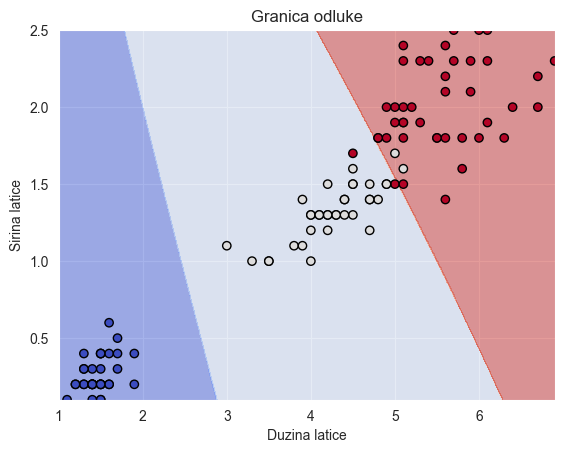

In [242]:
podrzaneVektorMasine(x,y, p = 0.25, c =1)

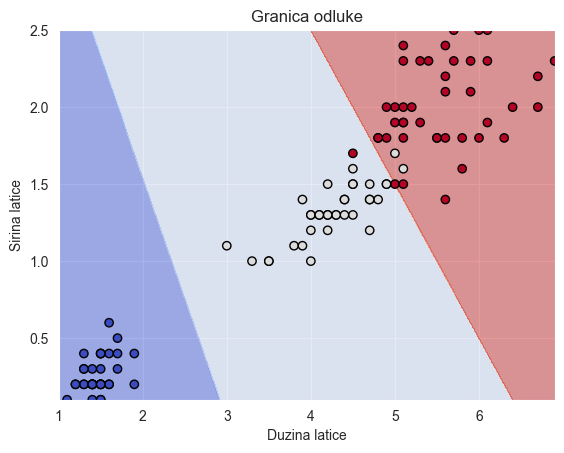

In [243]:
podrzaneVektorMasine(x,y, p = 0.25, c =1, kernel= 'linear')

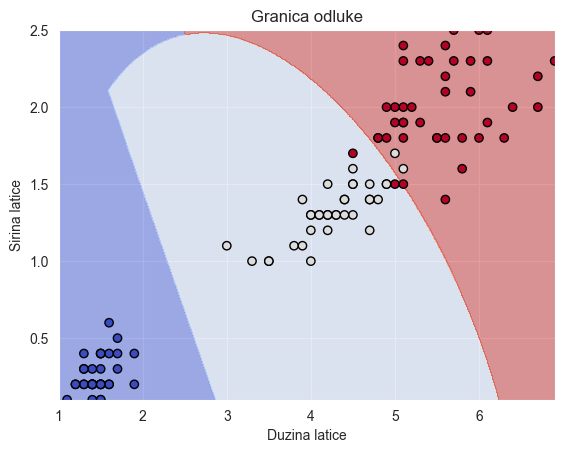

In [244]:
podrzaneVektorMasine(x,y, p = 0.25, c =15)

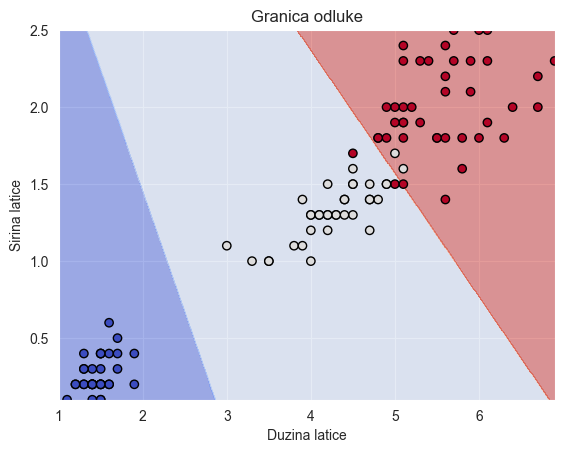

In [245]:
podrzaneVektorMasine(x,y, p = 0.25, c =15, kernel = 'linear')

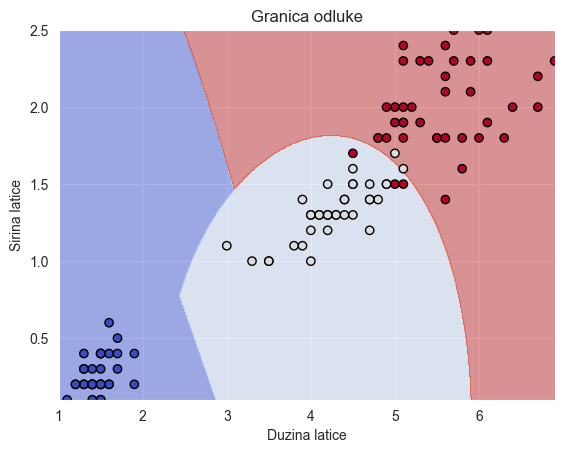

In [246]:
podrzaneVektorMasine(x,y,p = 0.25, c = 100)

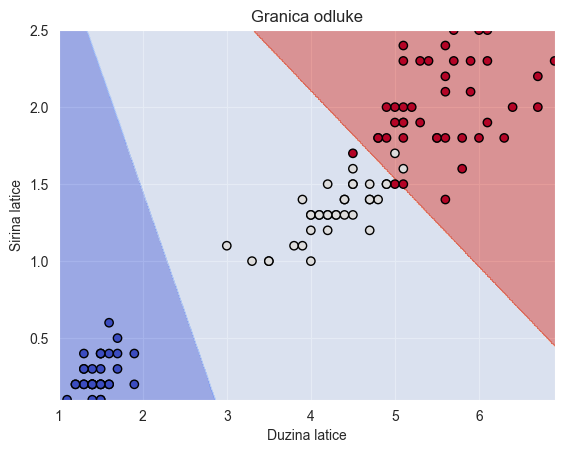

In [247]:
podrzaneVektorMasine(x,y,p = 0.25, c = 100, kernel= 'linear')

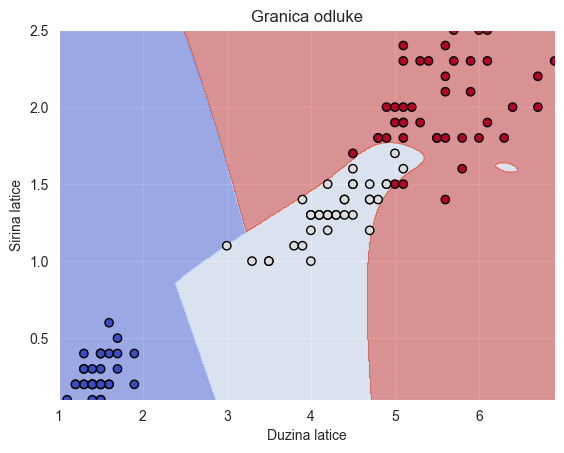

In [248]:
podrzaneVektorMasine(x,y,p = 0.25, c = 1000000)

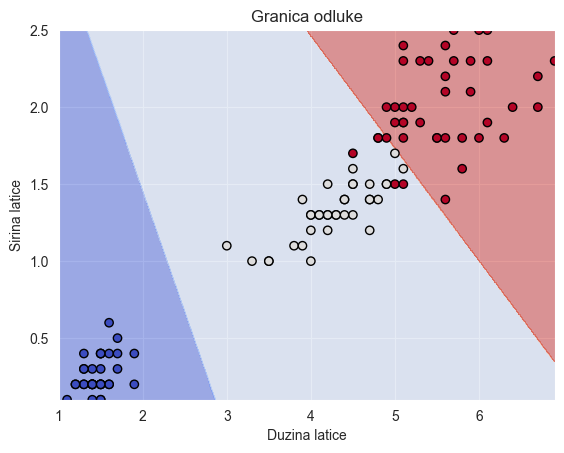

In [249]:
podrzaneVektorMasine(x,y,p = 0.25, c = 1000000, kernel= 'linear')

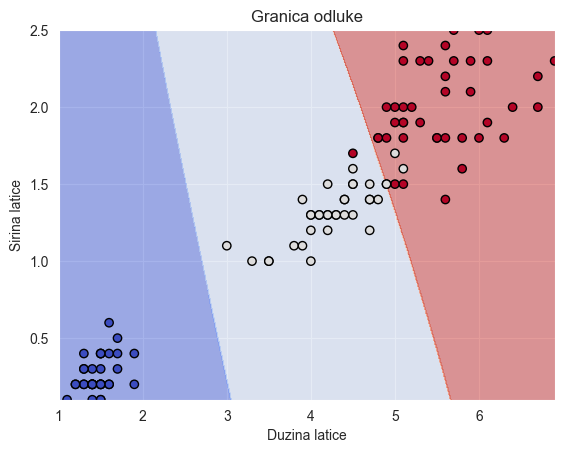

In [250]:
podrzaneVektorMasine(x,y,p = 0.25, c = 0.1)

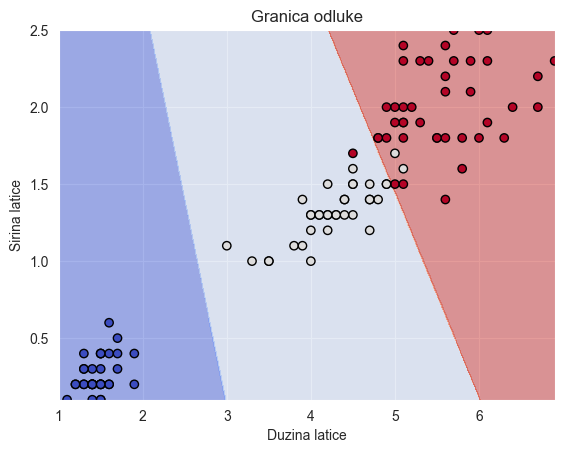

In [251]:
podrzaneVektorMasine(x,y,p = 0.25, c = 0.1, kernel= 'linear')

In [57]:
xtr,xtest, ytr, ytest = train_test_split(x, y, test_size=0.3)

In [58]:
xtr.shape, ytr.shape,dftr.shape

((105, 2), (105,), (105, 3))

In [61]:
model = SVC()

In [62]:
model.fit(xtr,ytr)

SVC()

In [121]:
pred = model.predict(xtest)
pred

array([0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0,
       1])

In [122]:
dftest = pd.concat([xtest,ytest, pd.Series(pred, name = 'pred', index = xtest.index)], axis = 1)

,petal length (cm),petal width (cm),cvet,pred
35,1.2,0.2,0,0
138,4.8,1.8,2,1
4,1.4,0.2,0,0
79,3.5,1.0,1,1
16,1.3,0.4,0,0
31,1.5,0.4,0,0
141,5.1,2.3,2,2
144,5.7,2.5,2,2
115,5.3,2.3,2,2
88,4.1,1.3,1,1


In [107]:
confusion_matrix(dftest['cvet'],dftest['pred'])

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  4, 15]])

In [118]:
dftest[dftest['cvet'] != dftest['pred']]

,petal length (cm),petal width (cm),cvet,pred
138,4.8,1.8,2,1
133,5.1,1.5,2,1
123,4.9,1.8,2,1
127,4.9,1.8,2,1


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: cvet, Length: 150, dtype: int64

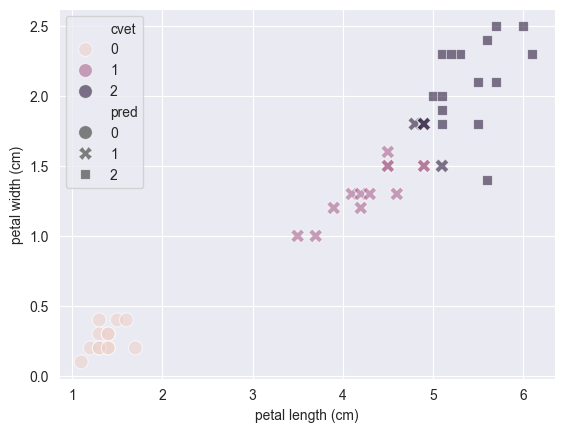

In [123]:
sns.scatterplot(data=dftest, x = dftest.iloc[:,0], y = dftest.iloc[:,1], hue='cvet', style = 'pred', alpha = 0.6, s = 100)

In [31]:
x1 = x[:,0]
x2 = x[:,1]
x1min, x2min, x1maks, x2maks = x1.min(), x2.min(), x1.max(), x2.max()

In [32]:
x1, x2 = np.meshgrid(np.linspace(x1min, x1maks, 1000),
                    np.linspace(x2min, x2maks,1000))
xgrid = np.c_[x1.ravel(), x2.ravel()]
xgrid

array([[1.        , 0.1       ],
       [1.00590591, 0.1       ],
       [1.01181181, 0.1       ],
       ...,
       [6.88818819, 2.5       ],
       [6.89409409, 2.5       ],
       [6.9       , 2.5       ]], shape=(1000000, 2))

In [33]:
z = model.predict(xgrid)
z = z.reshape(x1.shape)

In [34]:
z = z.reshape(x1.shape)
z.shape

(1000, 1000)

Text(0.5, 1.0, 'Granica odluke')

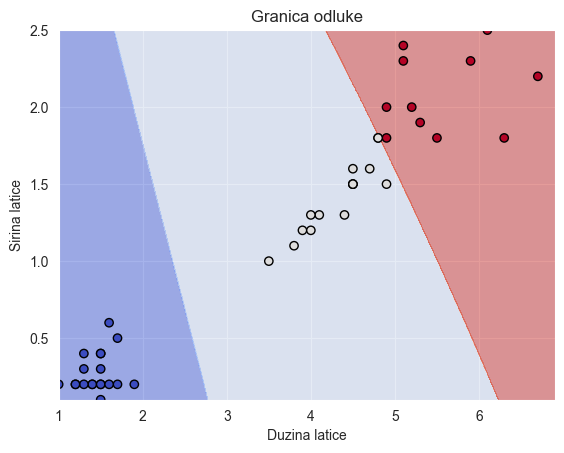

In [39]:
plt.contourf(x1, x2, z, alpha=0.5, cmap='coolwarm')
plt.scatter(xtest[:,0], xtest[:,1], c=ytest, cmap='coolwarm', edgecolor='k')  
plt.xlabel("Duzina latice")
plt.ylabel("Sirina latice")
plt.title("Granica odluke")

KeyError: 'pred'